# Parse data that has been used

InstaColorization rejected many files. By parsing what's left we know what's been used.

In [86]:
# Parse what has been used
from collections import Counter
files = 0

iiif = []
mandragore = []

files = 0
with open("./gt/colorization/filelist.log") as f:
    for line in f:
        fname = line.strip().split()[-1]
        if ".jpg" in fname:
            files += 1
            if "_p" in fname:
                iiif.append(fname.split("_")[0])
            else:
                mandragore.append(fname.split(".")[0])
            
            
print(files)
print(len(set(iiif)), len(iiif), Counter(iiif))
print(len(set(mandragore)), len(mandrago) len(mandragore), Counter(mandragore))



18788
50 8660 Counter({'bbb-0113': 579, 'fmb-cb-0018': 535, 'btv1b60005272': 530, 'bge-fr0076': 514, 'btv1b10515441p': 461, 'fmb-cb-0168': 441, 'btv1b52510692j': 376, 'btv1b10509662s': 346, 'btv1b10467092n': 326, 'btv1b55003999w': 307, 'fmb-cb-0001': 263, 'btv1b6000798t': 262, 'bcul-M0454': 245, 'btv1b52501503x': 240, 'btv1b525091393': 238, 'btv1b8419243k': 231, 'btv1b84702013': 219, 'bge-fr0182': 205, 'btv1b84516032': 200, 'fmb-cb-0015': 200, 'btv1b52000450j': 191, 'btv1b52509145q': 178, 'btv1b8490071m': 165, 'fmb-cb-0011': 159, 'btv1b6000366g': 158, 'btv1b8529505f': 145, 'btv1b550078004': 117, 'btv1b10022387j': 112, 'btv1b8468308j': 103, 'btv1b10527646p': 97, 'btv1b84386028': 72, 'btv1b52507230r': 71, 'btv1b105446322': 61, 'btv1b541003394': 60, 'btv1b54100460q': 52, 'btv1b6000371s': 44, 'btv1b52509007k': 26, 'btv1b10025466p': 19, 'btv1b85397092': 18, 'btv1b10509685z': 15, 'fmb-cb-0129': 15, 'btv1b525097003': 13, 'btv1b52510972v': 12, 'btv1b10025358s': 8, 'btv1b55013438c': 8, 'btv1b60

In [91]:
inverse_mandragor_counter = Counter([v for v in Counter(mandragore).values()])
sum([value for key, value in inverse_mandragor_counter.items() if key > 50])

23

# Describe the dataset

We need to know which centuries are represented

## Retrieve Mandragore data

In [45]:
import csv
import pandas as pd

siecles_mandragores = {}
with open("./gt/colorization/JD2018_ListeEnluminures.csv", encoding="latin") as f:
    reader = csv.DictReader(f, delimiter=";")
    for line in reader:
        lot = line.get("LOT")
        if lot in mandragore and lot not in siecles_mandragores:
            siecles_mandragores[lot] = line["Dt"]

## Retrieve IIIF Data

In [67]:
siecles_iiif = {}

with open("./gt/colorization/Ganuscrit - MSS.csv") as f:
    reader = csv.DictReader(f, delimiter=",")
    for line in reader:
        # Retrieve work id
        i, s = line["ID"], line["Siecle"]
        if i:
            siecles_iiif[i.lower()] = s
        if "codices" in line["Manifest"]:
            # Retrieve Manifest URI
            i = line["Manifest"].split("/")[-2].lower()
            siecles_iiif[i] = s
        elif not i:
            i = line["Manifest"].split("/")[-2].lower()
            siecles_iiif[i] = s
        
#siecles_iiif

### Plot !

Text(0, 0.5, 'Number of images in the training set')

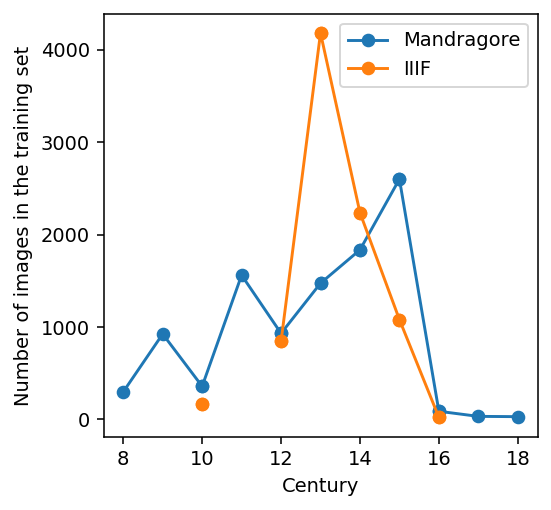

In [85]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(4,4), dpi=140)
ax = plt.gca()

# We keep the first century if we've got two
mandra_centuries = Counter([int(siecles_mandragores[lot].split()[0]) for lot in sorted(mandragore)])
# IIIF
iiif_centuries = Counter([
    int(siecles_iiif[btv.lower()])
    for btv in sorted(iiif)
    if "Divers" not in siecles_iiif[btv.lower()]
])

# We do a nice graphic
mandragore_serie = pd.DataFrame(
    [{"Century": key, "Population": value, "Source": "Mandragore"} for key, value in mandra_centuries.items()]
)
iiif_serie = pd.DataFrame(
    [
        {"Century": key, "Population": value, "Source": "Mandragore"}
        for key, value in iiif_centuries.items()
    ]
)

Centuries = sorted(list(set(mandra_centuries.keys())) + list(set(iiif_centuries.keys())))
DF = pd.DataFrame(
        [
            {
                "Century": key, 
                "Mandragore": mandra_centuries.get(key, None), 
                "IIIF": iiif_centuries.get(key, None)
            }
            for key in Centuries
        ]
)

#mandragore_serie.plot.scatter(x="Century", y="Population", marker="x", ax=ax)
#iiif_serie.plot.scatter(x="Century", y="Population", marker="o", ax=ax)

ax = DF.plot(x="Century", y=["Mandragore", "IIIF"], ax=ax, marker="o")
ax.set_ylabel("Number of images in the training set")